# Assignment: Exploratory Data Analysis


**Q1.** To compute the sample mean of a variable $X$:
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Solutions:**

Answers given in assignment folder, labeled Q1_Q1_Q2, Q1_Q3, Q1_Q4, and Q1_Q5.

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.

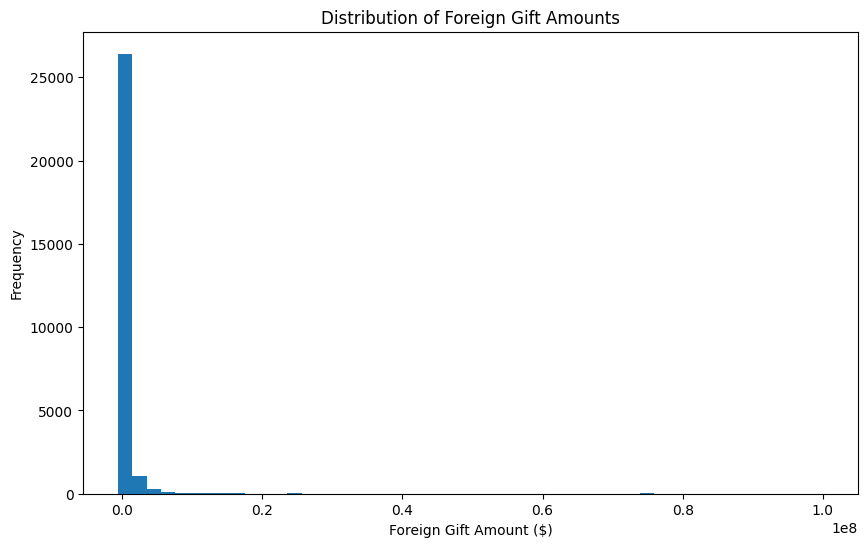

   ID   OPEID               Institution Name          City State  \
0   1  102000  Jacksonville State University  Jacksonville    AL   
1   2  104700                Troy University          Troy    AL   
2   3  105100          University of Alabama    Tuscaloosa    AL   
3   4  105100          University of Alabama    Tuscaloosa    AL   
4   5  105100          University of Alabama    Tuscaloosa    AL   

   Foreign Gift Received Date  Foreign Gift Amount      Gift Type  \
0                       43738               250000  Monetary Gift   
1                       43592               463657       Contract   
2                       43466              3649107       Contract   
3                       43472                 1000       Contract   
4                       43479                49476       Contract   

  Country of Giftor                          Giftor Name  
0             CHINA                                  NaN  
1             CHINA     Confucius Institute Headquarters  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv('./data/ForeignGifts_edu.csv')

# creating a histogram 
plt.figure(figsize=(10, 6))  
df['Foreign Gift Amount'].hist(bins=50, grid=False) 
plt.xlabel('Foreign Gift Amount ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Foreign Gift Amounts')
plt.show()

# describing the variable
print(df.head(),'\n')
print(df.describe(),'\n')

My findings are this:
- The histogram is very skewed to the right. A lot of the gift amounts are at the lower end, with a long tail extending to extremely high values. 
- The mean ($42.9K) is much larger than the median ($9.5K), confirming the right skew
- The large standard deviation ($641.9K) relative to the mean suggests high variability in gift amounts.

This shows that while most institutions receive modest foreign gifts, there is also a smaller number that receive larger contributions.

3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?

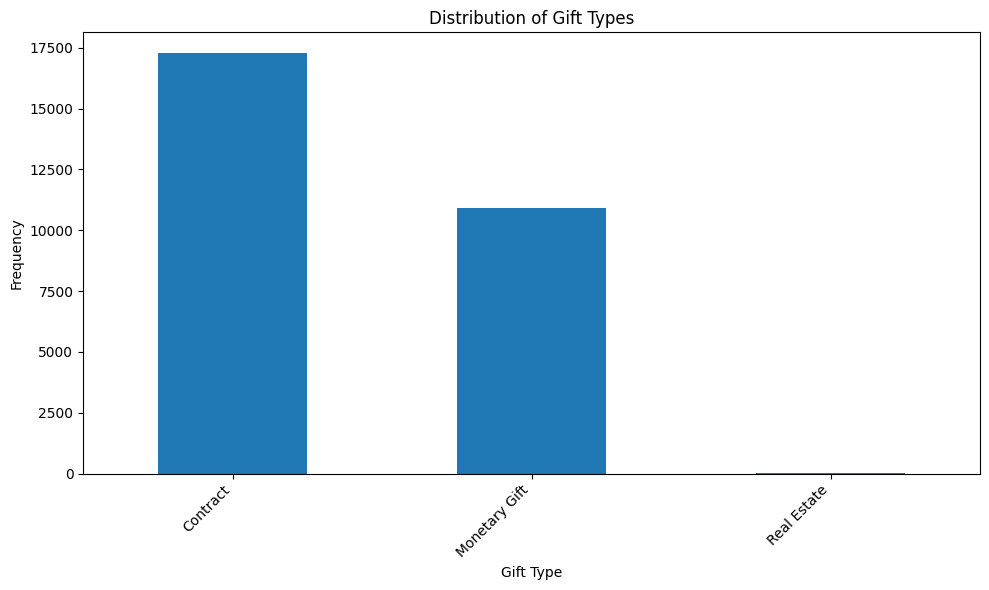

Gift Type Counts:
Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64 

Gift Type Proportions:
Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64 



In [14]:
# creating a histogram 
plt.figure(figsize=(10, 6))
df['Gift Type'].value_counts().plot(kind='bar', grid=False)
plt.xlabel('Gift Type')
plt.ylabel('Frequency')
plt.title('Distribution of Gift Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# calculate proportions
print("Gift Type Counts:")
print(df['Gift Type'].value_counts(), '\n')

print("Gift Type Proportions:")
proportions = df['Gift Type'].value_counts(normalize=True)
print(proportions, '\n')

- Contracts: 61.21%
- Monetary Gifts: 38.75%
- Real Estate: 0.04%

4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?

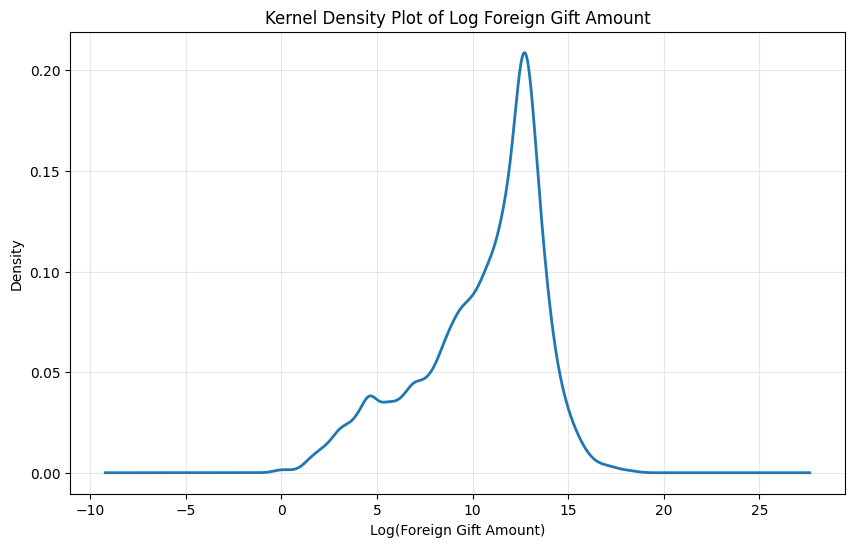

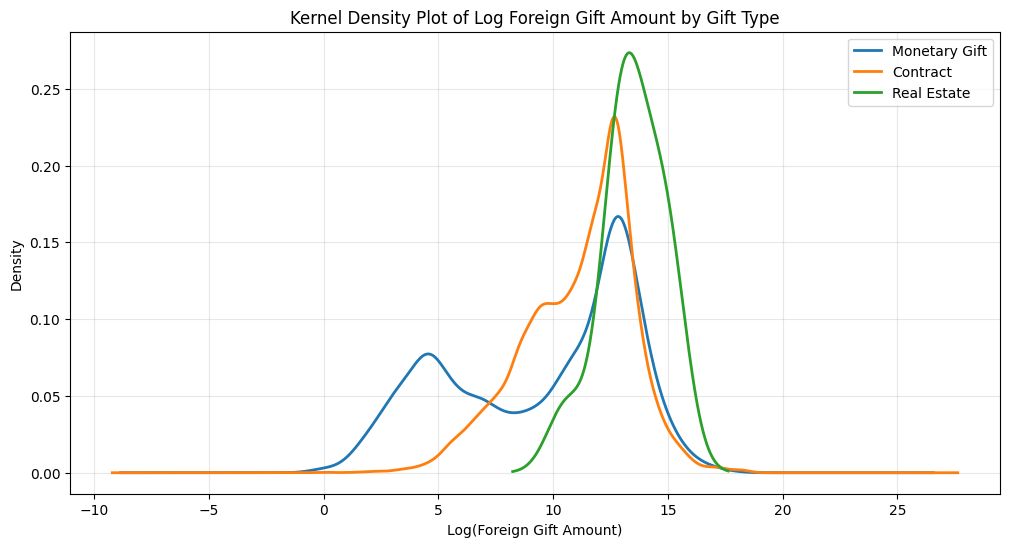

In [16]:
# data cleaning
df_clean = df[df['Foreign Gift Amount'] > 0].copy()
df_clean['Log Gift Amount'] = np.log(df_clean['Foreign Gift Amount'])

# kernel density plot of log of Foreign Gift Amount
plt.figure(figsize=(10, 6))
df_clean['Log Gift Amount'].plot(kind='kde', linewidth=2)
plt.xlabel('Log(Foreign Gift Amount)')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Log Foreign Gift Amount')
plt.grid(True, alpha=0.3)
plt.show()

# kernel density plot conditional on Gift Type
plt.figure(figsize=(12, 6))
for gift_type in df_clean['Gift Type'].unique():
    subset = df_clean[df_clean['Gift Type'] == gift_type]
    if len(subset) > 0: 
        subset['Log Gift Amount'].plot(kind='kde', label=gift_type, linewidth=2)

plt.xlabel('Log(Foreign Gift Amount)')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Log Foreign Gift Amount by Gift Type')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

With the kernel density plots, there are some patterns:

With the first graph, (the log of foreign gift amounts) it shows a somewhat bell-curve shape that's centered. It's mostly symmetric with a left skew. 

With the second graph, theres 3 different types. The monetary gifts chart is bimodal and has two peaks (smaller ones and larger ones). The larger gifts are way more common based on the height of that second peak.
The contracts chart is mostly unimodal with one peak. The distribution is symmetric and seems to be standardized. The real estate is unimodal with one big sharp peak. Additionally, real estate gifts tend to be worth more on average since the peak is further to the right than the others.

The overall distribution in the first plot basically looks like a combination of all three types, but real estate and contracts seem to dominate since their peaks line up with the main peak. It's also worth noting that the monetary gifts have two different peaks, which may lead to further analysis.

5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?

In [21]:
# Top 15 countries by number of gifts
top_countries_count = df['Country of Giftor'].value_counts().head(15)
print("Top 15 Countries by Number of Gifts:")
print(top_countries_count, '\n')

# Top 15 countries by total amount given
top_countries_amount = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print("Top 15 Countries by Total Amount Given:")
print(top_countries_amount, '\n')

Top 15 Countries by Number of Gifts:
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64 

Top 15 Countries by Total Amount Given:
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA

6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 

Top 15 Institutions by Total Amount Received:
Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int

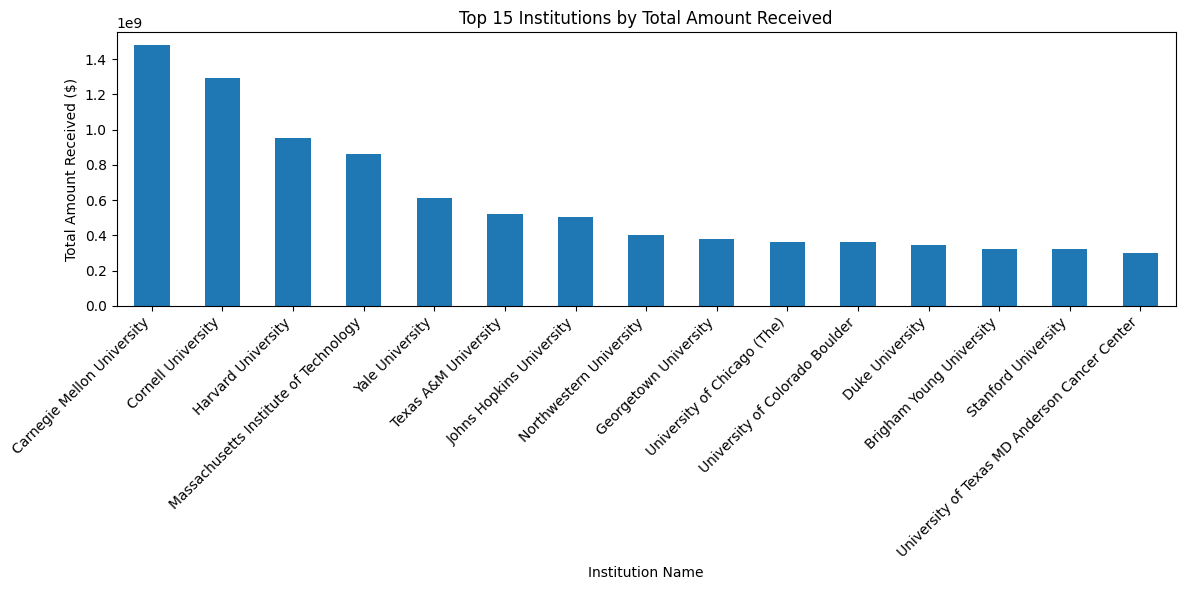

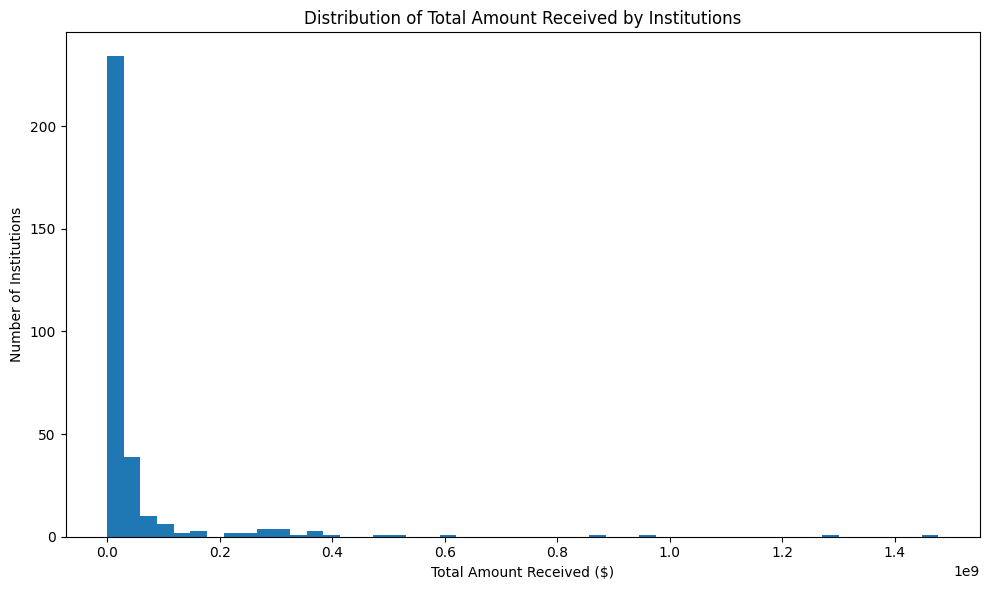

In [24]:
# Top 15 institutions by total amount received
top_institutions = df.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print("Top 15 Institutions by Total Amount Received:")
print(top_institutions, '\n')

# visualizing top 15 institutions
plt.figure(figsize=(12, 6))
top_institutions.plot(kind='bar', grid=False)
plt.xlabel('Institution Name')
plt.ylabel('Total Amount Received ($)')
plt.title('Top 15 Institutions by Total Amount Received')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# histogram of total amount received by all institutions
institution_totals = df.groupby('Institution Name')['Foreign Gift Amount'].sum()
plt.figure(figsize=(10, 6))
institution_totals.hist(bins=50, grid=False)
plt.xlabel('Total Amount Received ($)')
plt.ylabel('Number of Institutions')
plt.title('Distribution of Total Amount Received by Institutions')
plt.tight_layout()
plt.show()

7. Which giftors provide the most money, in total?

Top 15 Giftors by Total Amount Given:
Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64 



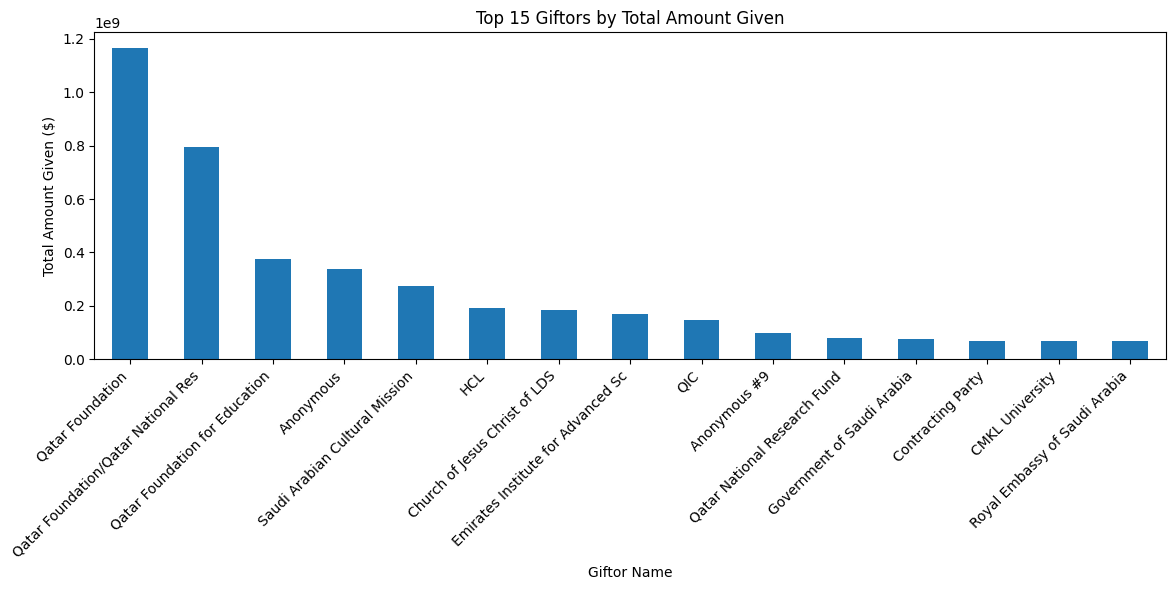

In [31]:
# Top giftors by total amount given
top_giftors = df.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print("Top 15 Giftors by Total Amount Given:")
print(top_giftors, '\n')

# visualizing top 15 giftors
plt.figure(figsize=(12, 6))
top_giftors.plot(kind='bar', grid=False)
plt.xlabel('Giftor Name')
plt.ylabel('Total Amount Given ($)')
plt.title('Top 15 Giftors by Total Amount Given')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.